# Data Exploration Analysis of Crime Victim Data
## A. C. Coffin 
### 11/10/2023
### Northwestern Missouri State University
### MS Data Analytics Capstone
---
Data Exploration is critical to this project as victim data is often incomplete. In total there are 6 data sets that are utilized in this project, each of these have been loaded into an SQL database. Through the use of an SQL database it is possible to pull information from multiple sets when referencing data pulled from the National Crime Victim Survey (N-Dash). In order to pull the information from the N-Dash multiple quiries were made from the source and compiled into four data sets. All quieries were exported from the SQL server as CSV files. Complete list of sources:

* New York Police Department Open Portal
* N-Dash Bureau of Justices Statistics

Each of these regions has been selected based on geographical, socioeconomic diversity, industry level and population. Each of the individual regions has been analysized first and then the NCVS data. 

---

# Libraries & Files:
Data from the N-Dash has been stored as seperate unionized sets after being processed through SQL. All original data pulled from this database has been added to the file labeled Raw_Data. This notebook contains the DEA for the selected cities and states. See other notebook for data pertaining to the NCVS Data.

In [94]:
#Import Libraries:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.express as px
import statsmodels.stats.outliers_influence 
import statsmodels.tools.tools 
import statistics as stat
import seaborn as sns
import matplotlib.dates as mdates
import datetime as dt

#Import Datasets:
NYPD = pd.read_csv('Data/NYPDv3.csv')



# Exploration:
This section samples the initial exploration that had initially been completed within PostgreSQL as well as the basic information types within the data. This section is mainly to ensure that the tables have been imported correctly. From there the catagories that were essential to analysis were selected. In this case, OFENS_DESC, RACE, AGE_GROUP have been selected for each location. With the selected data a series of charts were created to better comprehend the initial data. 

Investigating the general nature of the dataset including data types.

## 1: New York PD, NY:
Basic types of data pulled.

In [2]:
NYPD.describe()

,ADDR_PCT_CD,CMPLNT_FR_DTM,KY_CD,PD_CD,AGE_GM,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,103057.000000,103057.000000,103057.000000,103036.000000,103057.000000,1.030570e+05,103057.000000,103057.000000,103057.000000
mean,65.722658,44994.797850,332.213814,407.558416,3.190953,1.006671e+06,207848.806680,40.737119,-73.919060
std,33.607802,260.579349,174.767012,224.672578,1.020455,2.195242e+04,31089.151447,0.085336,0.079168
min,1.000000,33970.000000,101.000000,100.000000,1.000000,9.139600e+05,121390.000000,40.499616,-74.252751
25%,42.000000,44966.000000,121.000000,198.000000,3.000000,9.953460e+05,183864.000000,40.671261,-73.959982
50%,67.000000,45015.000000,344.000000,397.000000,3.000000,1.006413e+06,206251.000000,40.732785,-73.920044
75%,101.000000,45061.000000,578.000000,638.000000,4.000000,1.019164e+06,237087.000000,40.817396,-73.874038
max,123.000000,45107.000000,678.000000,922.000000,6.000000,1.067226e+06,271730.000000,40.912468,-73.700565


In [3]:
grouped_data = NYPD["OFNS_DESC"].groupby(NYPD["OFNS_DESC"]).count()
sorted_data = grouped_data.sort_values(ascending=False)
display(sorted_data)


OFNS_DESC
HARRASSMENT 2                           26291
ASSAULT 3 & RELATED OFFENSES            14706
PETIT LARCENY                           12641
GRAND LARCENY                            9646
CRIMINAL MISCHIEF & RELATED OF           7030
OFF. AGNST PUB ORD SENSBLTY &            6009
FELONY ASSAULT                           5511
MISCELLANEOUS PENAL LAW                  4723
SEX CRIMES                               3505
GRAND LARCENY OF MOTOR VEHICLE           2078
ROBBERY                                  2037
BURGLARY                                 1641
VEHICLE AND TRAFFIC LAWS                 1470
OFFENSES AGAINST PUBLIC ADMINI           1382
THEFT-FRAUD                              1202
RAPE                                      708
FRAUDS                                    596
CRIMINAL TRESPASS                         274
DANGEROUS WEAPONS                         253
POSSESSION OF STOLEN PROPERTY             241
UNAUTHORIZED USE OF A VEHICLE             231
OFFENSES AGAINST THE PER

In [4]:
grouped_data1 = NYPD.groupby('KY_CD')['OFNS_DESC'].value_counts().reset_index(name='Count')
sorted_d2 = grouped_data1.sort_values(by='Count', ascending=False)
top_10 = sorted_d2.head(10)
display(top_10)

,KY_CD,OFNS_DESC,Count
57,578,HARRASSMENT 2,26291
39,344,ASSAULT 3 & RELATED OFFENSES,14706
36,341,PETIT LARCENY,12641
6,109,GRAND LARCENY,9646
52,361,OFF. AGNST PUB ORD SENSBLTY &,6009
4,106,FELONY ASSAULT,5511
46,351,CRIMINAL MISCHIEF & RELATED OF,4662
24,126,MISCELLANEOUS PENAL LAW,4615
29,233,SEX CRIMES,3008
20,121,CRIMINAL MISCHIEF & RELATED OF,2368


Text(0.5, 1.0, 'NYPD Incidents by Crime top 15')

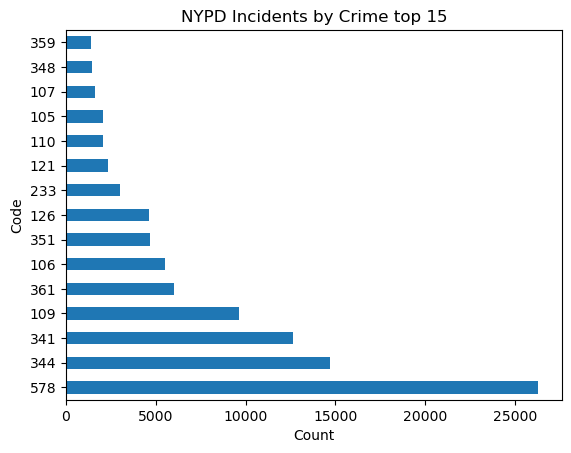

In [5]:
grouped_KY = NYPD["KY_CD"].groupby(NYPD["KY_CD"]).count()
sorted_KY = grouped_KY.sort_values(ascending=False)
top_15 = sorted_KY.head(15)
top_15.plot(kind="barh")
plt.xlabel('Count')
plt.ylabel('Code')
plt.title("NYPD Incidents by Crime top 15")

Crime Data is classified into seperate catagories which are either noted with an offnse description or associated with a Number. These numbers are often called NIBRS Codes or Key Codes. Each provides a numerical way to catagorize data. In this instance a KY_CD 578 is a Harassment Code. The most common crime that women are victims to is Harrasment 2, which is considered a Personal Crime. Personal Crimes include sexual assault, roppery, aggravated assault, simple assault, and murder. When looking at the most common crimes women are often victims of according to the NYPD the most common crimes are Personal. When examining the role of victims in crimes it can also be noted that a large number of women are often victims of assisting a felony, disorderly conduct in a public setting or a miscellaneous penal law. Each of these is not traditionally covered in NCVS data, but still relevant to understanding the victimology of women.

Text(0.5, 1.0, 'NYPD Incidents by Crime Code')

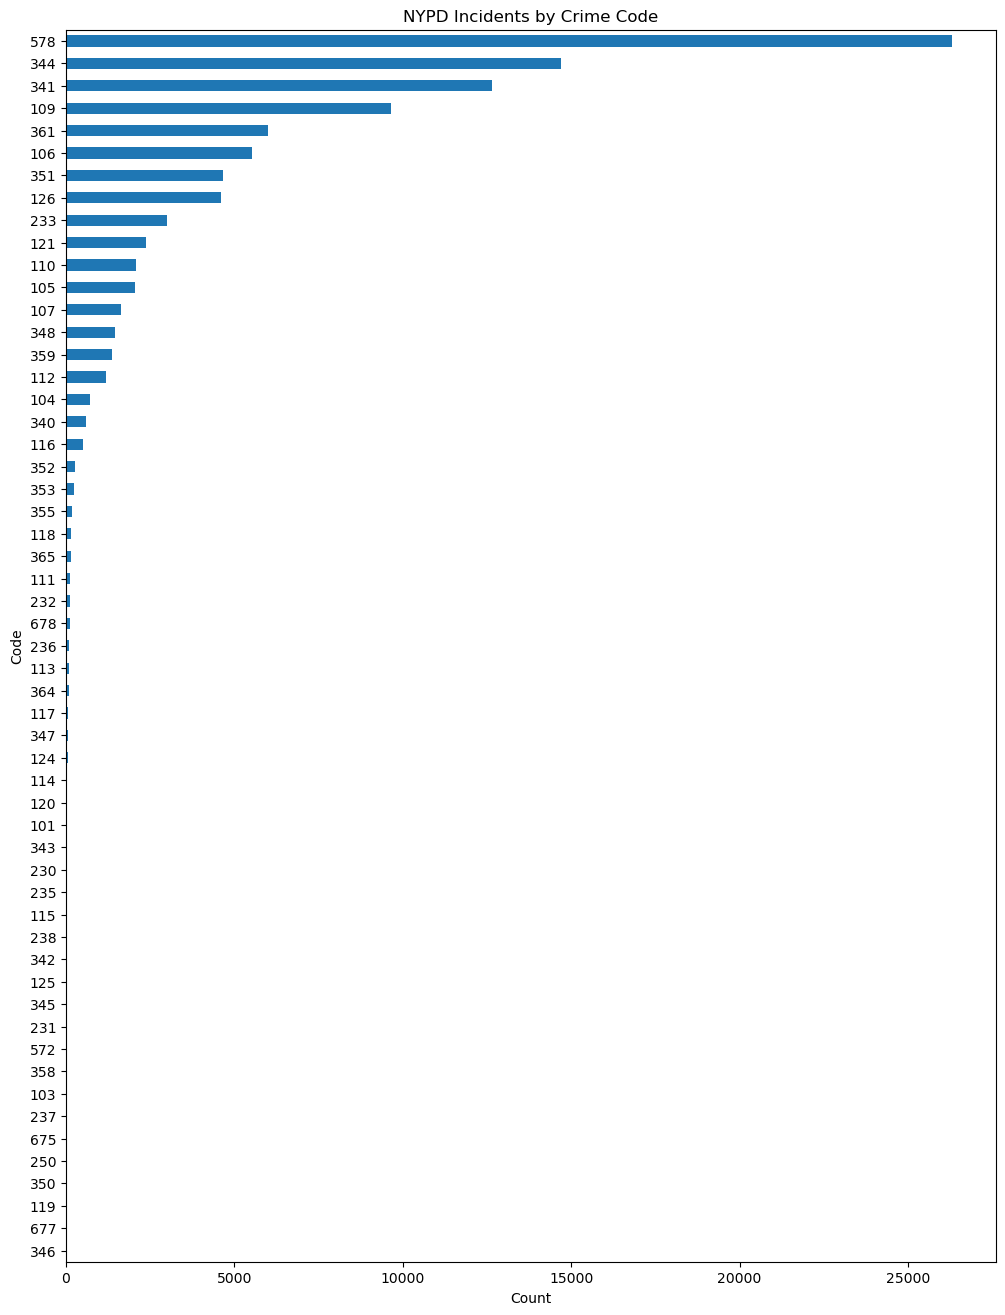

In [6]:
plt.figure(figsize=(12, 16))
grouped_data = NYPD["KY_CD"].groupby(NYPD["KY_CD"]).count()
sorted_data = grouped_data.sort_values(ascending=True)
sorted_data.plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Code")
plt.title("NYPD Incidents by Crime Code")

Text(0.5, 1.0, 'NYPD Incidents by Borough')

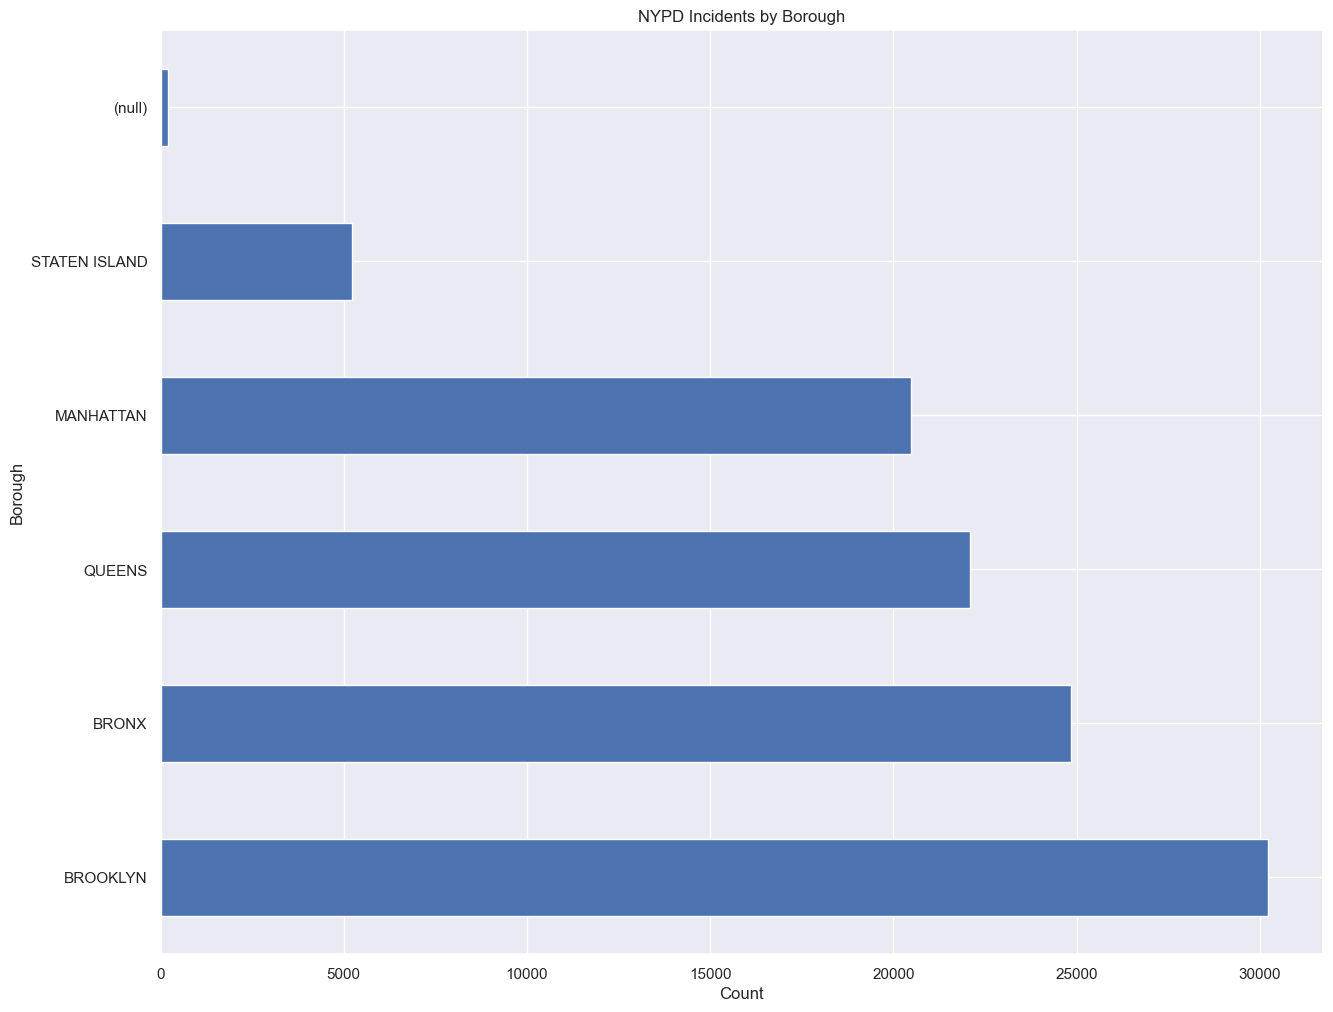

In [44]:
# New York PD, NY:
grouped_GEO = NYPD["BORO_NM"].groupby(NYPD["BORO_NM"]).count()
sorted_data = grouped_GEO.sort_values(ascending=False)

sorted_data.plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Borough")
plt.title("NYPD Incidents by Borough")



In [8]:
grouped_dt = NYPD.groupby('CMPLNT_FR_DT')['CMPLNT_FR_DTM'].value_counts().reset_index(name='Count')
sorted_d3 = grouped_dt.sort_values(by='Count', ascending=False)
display(sorted_d3)



,CMPLNT_FR_DT,CMPLNT_FR_DTM,Count
669,5/1/2023,45047,682
21,1/1/2023,44927,662
680,5/12/2023,45058,630
704,5/2/2023,45048,622
744,5/5/2023,45051,618
...,...,...,...
323,12/3/2020,44168,1
324,12/3/2021,44533,1
694,5/17/2021,44333,1
326,12/30/2020,44195,1


The data for this project ranges from 01/01/1993 to 01/01/2024 as this is the same span of time that data from the NCVS was available. 

Text(0.5, 1.0, 'NYPD Reports by Date: 2020 - 2023')

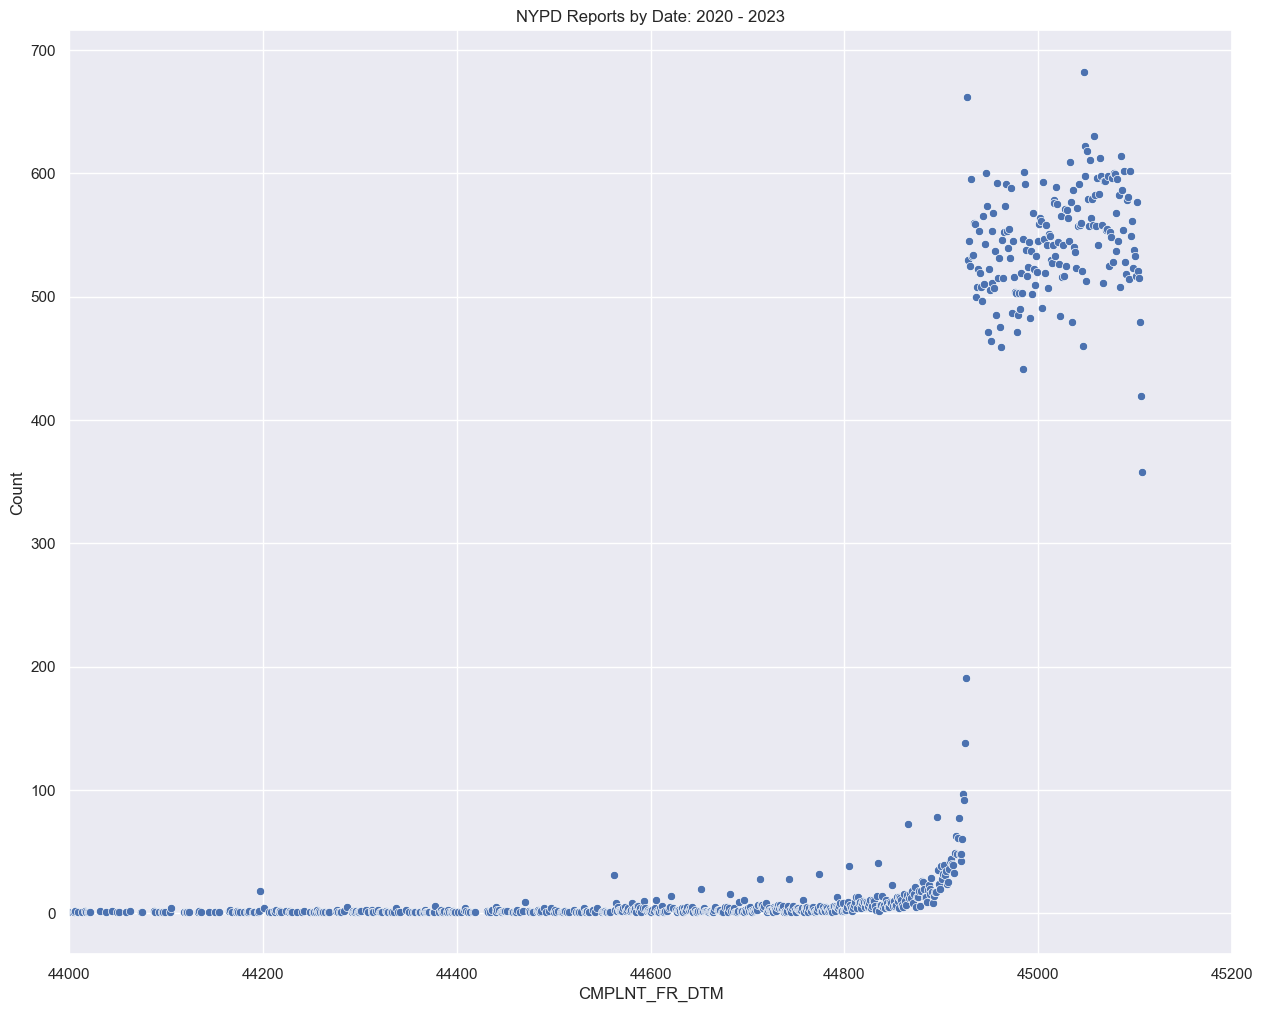

In [33]:
# Number of cases reported daily with female victims from 1993 to 2023
#Group Cases Based on Date
grouped_dt = NYPD.groupby('CMPLNT_FR_DT')['CMPLNT_FR_DTM'].value_counts().reset_index(name='Count')

# Creating Scatter:
sns.set(style="whitegrid")
sns.set(rc={"figure.figsize": (15,12)})
sns.scatterplot(data=grouped_dt, x="CMPLNT_FR_DTM", y="Count")
plt.xlim(44000, 45200)
plt.title("NYPD Reports by Date: 2020 - 2023")




All Age Groups have been assigned a corresponding number to represent them. 
|Age Group| Number|
|:---|:---|
|<18|1|
|18 - 24| 2|
|25 - 44| 3|
|45 - 64| 4|
|65 +| 5|
|Unknown| 6|

Text(0, 0.5, 'AGE_GROUP')

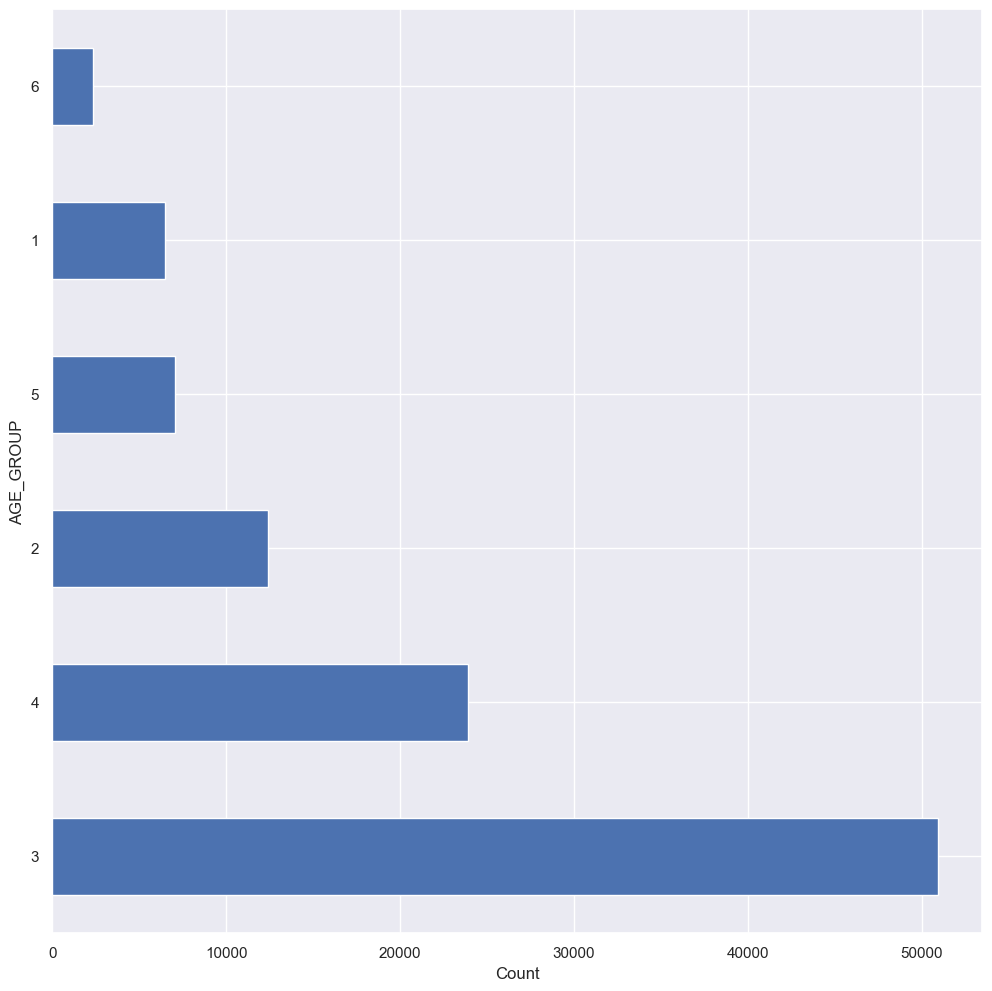

In [76]:
#grouped_dt = NYPD.groupby('CMPLNT_FR_DT')['CMPLNT_FR_DTM'].value_counts().reset_index(name='Count')
# New York PD, NY:
grouped_AGE = NYPD["AGE_GM"].groupby(NYPD["AGE_GM"]).count()
sorted_data = grouped_AGE.sort_values(ascending=False)
sorted_data.plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("AGE_GROUP")


# NCVS Data:
The National Crime Victim Survey has a massive amount of data utilized annually. As a result each year is summarized as an numeric mean for the number of cases reported through the survey. Each survey reports from households age, race, gender, crimes that they have experienced, injuries, whether the crime was reported and more. For this Project we will be looking at age, regional data and the type of crime. In terms of regional data the breakdown of specific types of crimes such as robbery, assault and sexual assault are in seperate catagroies based on thier NCIC numbers. Where as the data pertaining to age is more general. The NCVS also records data from minors as old as 12 and groups ages into 8 catagories.
## Catagory Codes
|Age Group| Number|Crime Type| Number|Region| Number|
|:---|:---|:---|:---|:---|:---|
|12 - 14|1|Simple Assault| 1|North East| 1|
|15 - 17| 2|Violent Crime Except Simple Assault| 2|South| 2|
|18 - 20| 3|Sexual Assault| 1101|Midwest| 3|
|21 - 24| 4|Robbery| 1201|West| 4|
|25 - 34| 5|Aggravated Assault| 1301|-|-|
|35 - 49| 6|Simple Assault| 1313|-|-|
|50 - 64| 7|-|-|-|-|
|65 +| 8|-|-|-|-|


In [93]:
# Importing NCVS Data Cleaned:
NCVS_RegionSeg = pd.read_csv('Data/NCVS_RegionSegv1.csv')
NCVS_Region = pd.read_csv('Data/NCVS_Regionv1.csv')
NCVS_AgeSeg = pd.read_csv('Data/NCVS_AgeSeg.csv')
NCVS_AgeType = pd.read_csv('Data/NatFlow_AgeTypev1.csv')

# Characteristics of the Data:
Data Sets that are labeled segmented means that crimes such as robbery and assault are clearly noted. Where as general sets only differenciate violent crime from assaults. This is a result of how the data was pulled from the NCVS as a series of quieries to the N-Dash. 

## Region Analysis:

In [82]:
NCVS_RegionSeg.describe()

,rpt_dt,rpt_dtm,region_m,NCIC,vic_num,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,432.000000,432.000000,432.00000,432.000000,4.320000e+02,0.0,0.0,0.0,0.0,27.000000
mean,2009.000000,39813.629630,2.50000,1229.000000,2.157819e+05,NaN,NaN,NaN,NaN,2009.000000
std,7.797912,2848.203871,1.11933,85.843218,2.420097e+05,NaN,NaN,NaN,NaN,7.937254
min,1996.000000,35065.000000,1.00000,1101.000000,1.010800e+04,NaN,NaN,NaN,NaN,1996.000000
25%,2002.000000,37257.000000,1.75000,1176.000000,6.804000e+04,NaN,NaN,NaN,NaN,2002.500000
50%,2009.000000,39814.000000,2.50000,1251.000000,1.067280e+05,NaN,NaN,NaN,NaN,2009.000000
75%,2016.000000,42370.000000,3.25000,1304.000000,2.738938e+05,NaN,NaN,NaN,NaN,2015.500000
max,2022.000000,44562.000000,4.00000,1313.000000,1.355884e+06,NaN,NaN,NaN,NaN,2022.000000


In [83]:
NCVS_RegionSeg.head(3)

,rpt_dt,rpt_dtm,sex,region,region_m,crime_type,NCIC,vic_num,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1996,35065,F,SOUTH,2,RAPE/SEXUAL ASSAULT,1101,145675,NaN,NaN,NaN,NaN,NaN
1,1997,35431,F,SOUTH,2,RAPE/SEXUAL ASSAULT,1101,210209,NaN,NaN,NaN,NaN,NaN
2,1998,35796,F,SOUTH,2,RAPE/SEXUAL ASSAULT,1101,120428,NaN,NaN,NaN,NaN,NaN


In [84]:
NCVS_Region.describe()

,rpt_dt,rpt_dt.1,region_m,vic_num
count,108.000000,108.000000,108.000000,1.080000e+02
mean,2009.000000,39813.629630,2.500000,8.631276e+05
std,7.825193,2858.168463,1.123246,3.591592e+05
min,1996.000000,35065.000000,1.000000,3.129620e+05
25%,2002.000000,37257.000000,1.750000,6.024108e+05
50%,2009.000000,39814.000000,2.500000,8.311625e+05
75%,2016.000000,42370.000000,3.250000,1.012374e+06
max,2022.000000,44562.000000,4.000000,2.157217e+06


In [85]:
NCVS_Region.head(3)

,rpt_dt,rpt_dt.1,sex,region,region_m,crime_type,vic_num
0,1996,35065,F,NORTHEAST,1,VIOLENT VICTIMIZATION,899694
1,1997,35431,F,NORTHEAST,1,VIOLENT VICTIMIZATION,1084228
2,1998,35796,F,NORTHEAST,1,VIOLENT VICTIMIZATION,860655


<Axes: xlabel='rpt_dt', ylabel='vic_num'>

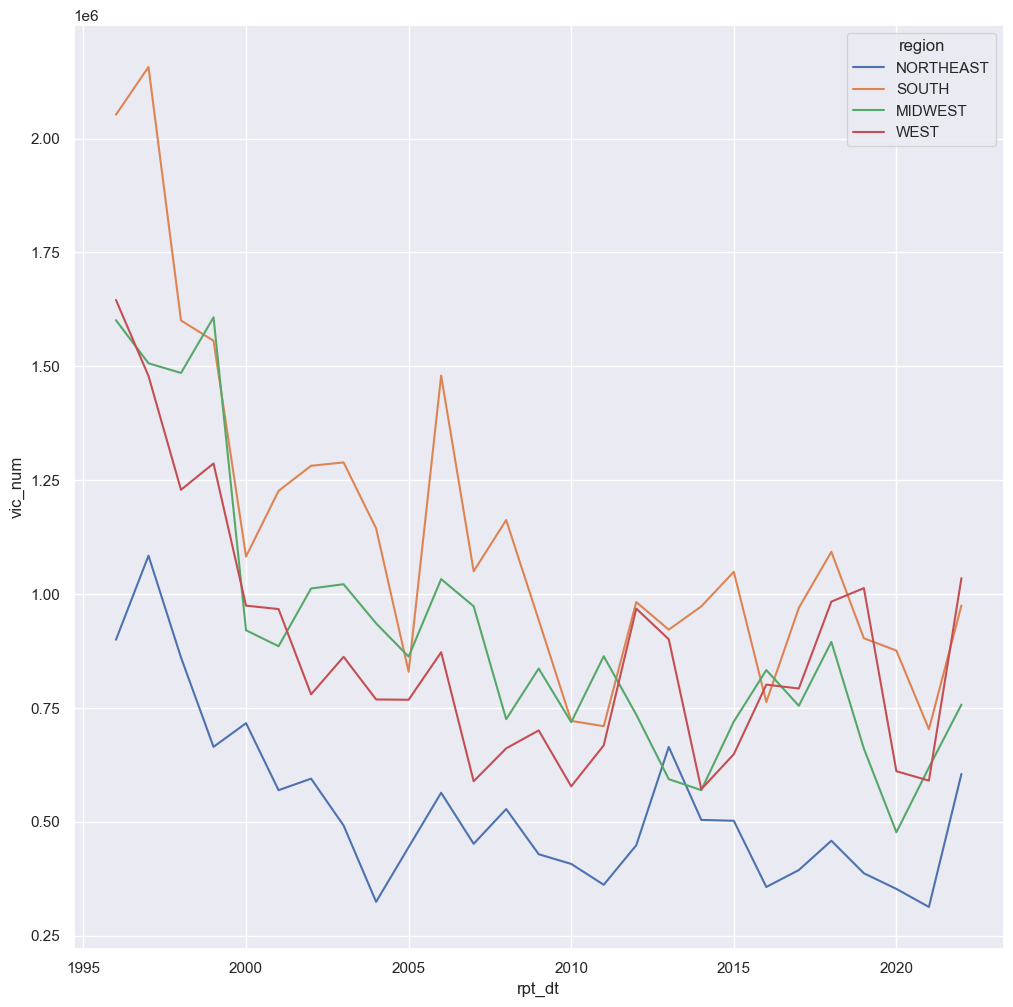

In [74]:
# Regional Line Chart for Number of victims over time
sns.lineplot(data=NCVS_Region, x='rpt_dt', y='vic_num', hue='region')

<Axes: xlabel='rpt_dt', ylabel='vic_num'>

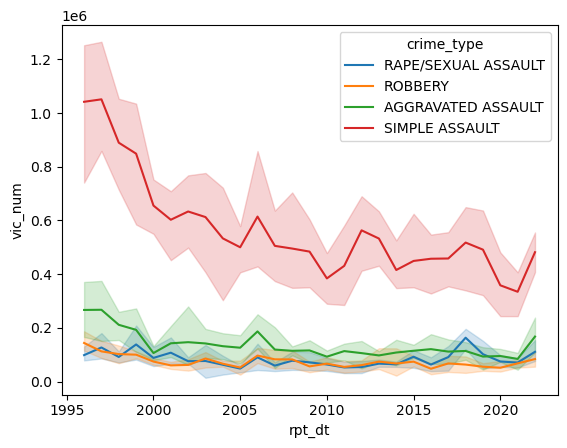

In [94]:
sns.lineplot(data=NCVS_RegionSeg, x='rpt_dt', y='vic_num', hue='crime_type')

<Axes: xlabel='rpt_dt', ylabel='vic_num'>

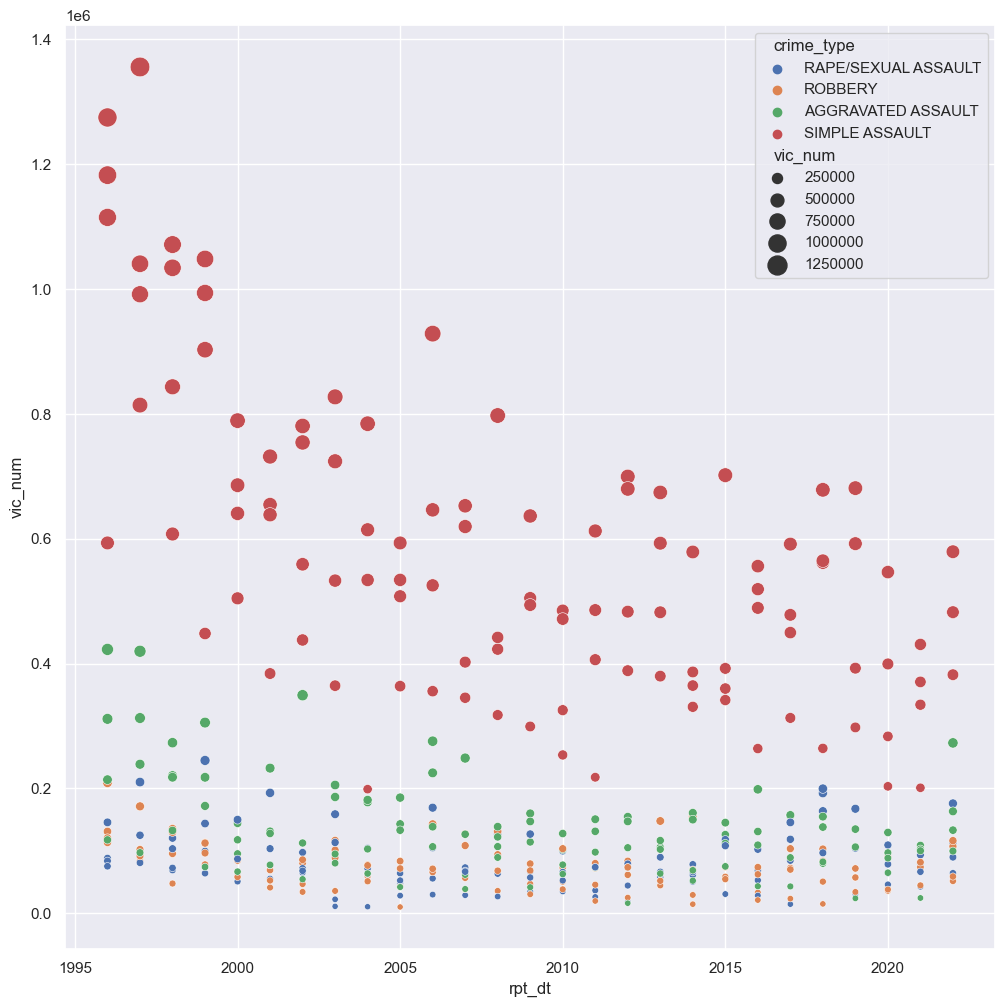

In [105]:
sns.set(rc={"figure.figsize": (12,12)})
sns.scatterplot(
    data=NCVS_RegionSeg, x="rpt_dt", y="vic_num", hue="crime_type", 
    size="vic_num", sizes=(20,200))

## NCVS Age Data:

In [88]:
NCVS_AgeType.describe()

,RPT_DT,RPT_DTM,AGE_GM,CT_M,VIC_NUM
count,480.000000,480.000000,480.000000,480.000000,4.800000e+02
mean,2007.500000,39265.766667,4.500000,1.500000,2.379812e+05
std,8.664472,3164.691052,2.293678,0.500522,2.108395e+05
min,1993.000000,33970.000000,1.000000,1.000000,9.431000e+03
25%,2000.000000,36526.000000,2.750000,1.000000,9.324550e+04
50%,2007.500000,39265.500000,4.500000,1.500000,1.855230e+05
75%,2015.000000,42005.000000,6.250000,2.000000,3.114895e+05
max,2022.000000,44562.000000,8.000000,2.000000,1.286595e+06


In [95]:
NCVS_AgeType.head(3)

,RPT_DT,RPT_DTM,SEX,AGE_GROUP,AGE_GM,CRIME_TYPE,CT_M,VIC_NUM
0,1993,33970,F,21-24,4,SIMPLE ASSAULT,1,506603
1,1994,34335,F,21-24,4,SIMPLE ASSAULT,1,620518
2,1995,34700,F,21-24,4,SIMPLE ASSAULT,1,561957


In [96]:
NCVS_AgeSeg.describe()

,rpt_dt,age_gm,ncic,vic_num
count,960.000000,960.000000,960.000000,9.600000e+02
mean,2007.500000,4.500000,1229.000000,1.189906e+05
std,8.659953,2.292482,85.788498,1.729374e+05
min,1993.000000,1.000000,1101.000000,0.000000e+00
25%,2000.000000,2.750000,1176.000000,2.345025e+04
50%,2007.500000,4.500000,1251.000000,5.639350e+04
75%,2015.000000,6.250000,1304.000000,1.287462e+05
max,2022.000000,8.000000,1313.000000,1.286595e+06


In [97]:
NCVS_AgeSeg.head(3)

,rpt_dt,sex,age_group,age_gm,ofns_desc,ncic,vic_num
0,1993,Female,12- 14,1,Rape/sexual assault,1101,47196
1,1994,Female,12- 14,1,Rape/sexual assault,1101,49561
2,1995,Female,12- 14,1,Rape/sexual assault,1101,38205


<Axes: xlabel='RPT_DT', ylabel='VIC_NUM'>

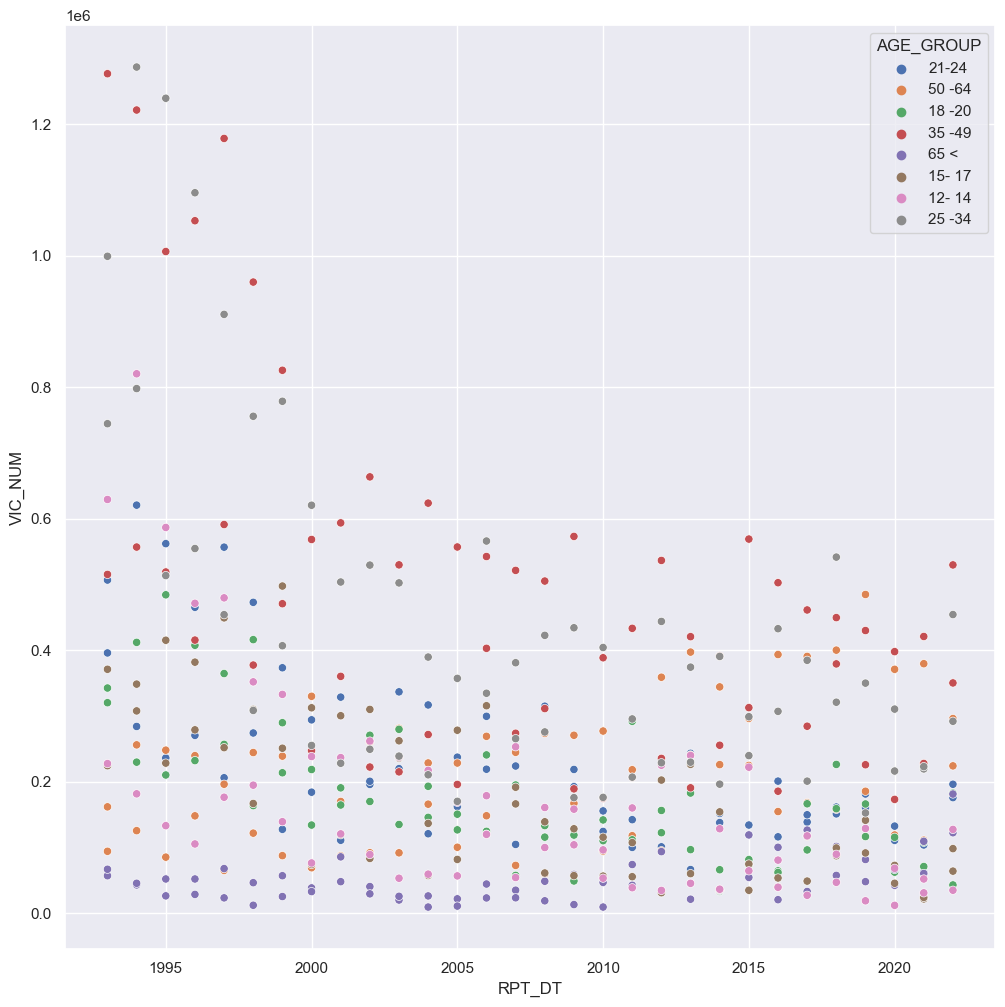

In [86]:
# Age and Type of Crime Nationally
sns.set(rc={"figure.figsize": (12,12)})
sns.scatterplot(
    data=NCVS_AgeType, x="RPT_DT", y="VIC_NUM", hue="AGE_GROUP")

<Axes: xlabel='AGE_GROUP', ylabel='VIC_NUM'>

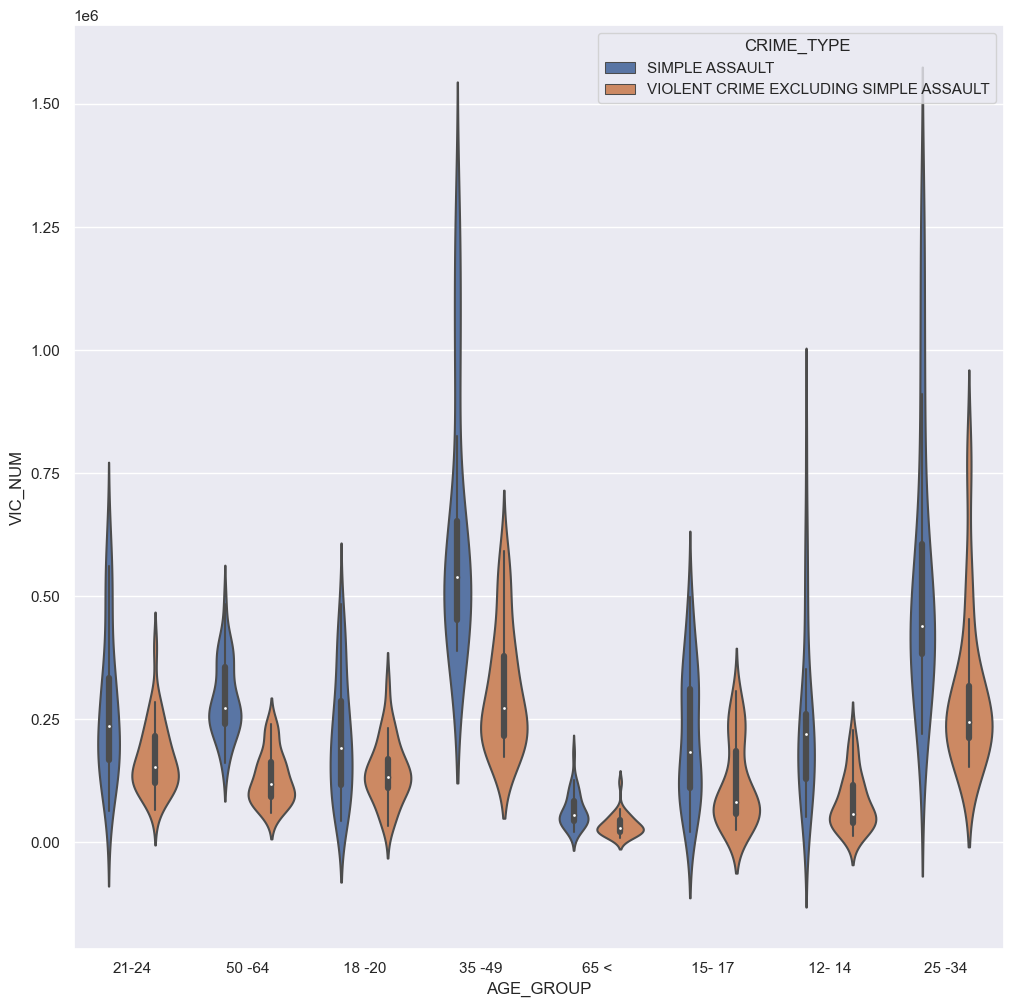

In [108]:
sns.violinplot(data=NCVS_AgeType, x='AGE_GROUP', y='VIC_NUM', hue='CRIME_TYPE')

Nationally women between the ages of 25 to 34 and 35 to 49 are more likely to experience simple assulat. It is also true that a larger number of victims within these groups also reported a higher number of violent crimes. This falls in line with the general statistic that those within the 25 to 34 age group are more likely to experience a violent crime according to Doerner. The group that is mainly concern is the large number of children under 18 that experience a form of Simple Assault. This age group is difficult to gague due to the nature of the crimes committed with children as victims. 

<Axes: xlabel='age_group', ylabel='vic_num'>

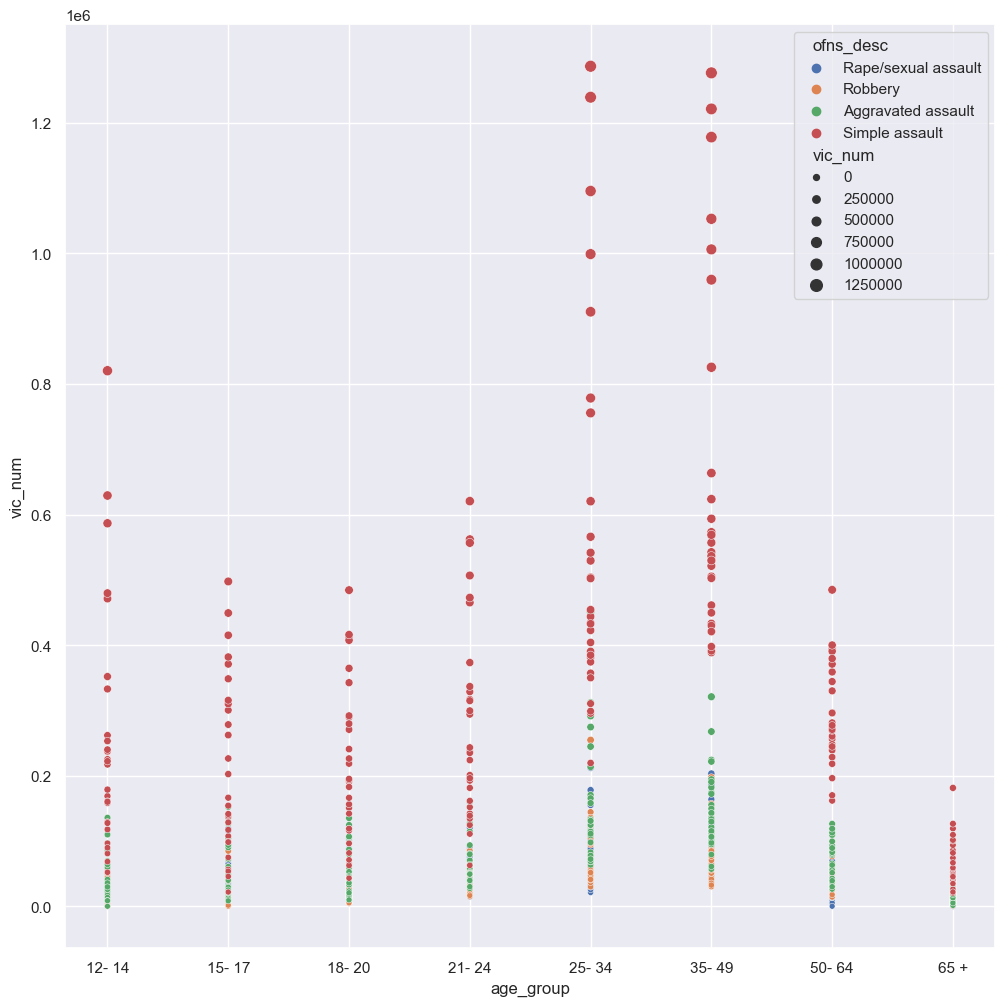

In [109]:
sns.scatterplot(data=NCVS_AgeSeg, x='age_group', y='vic_num', hue='ofns_desc', size='vic_num')

<Axes: xlabel='rpt_dt', ylabel='vic_num'>

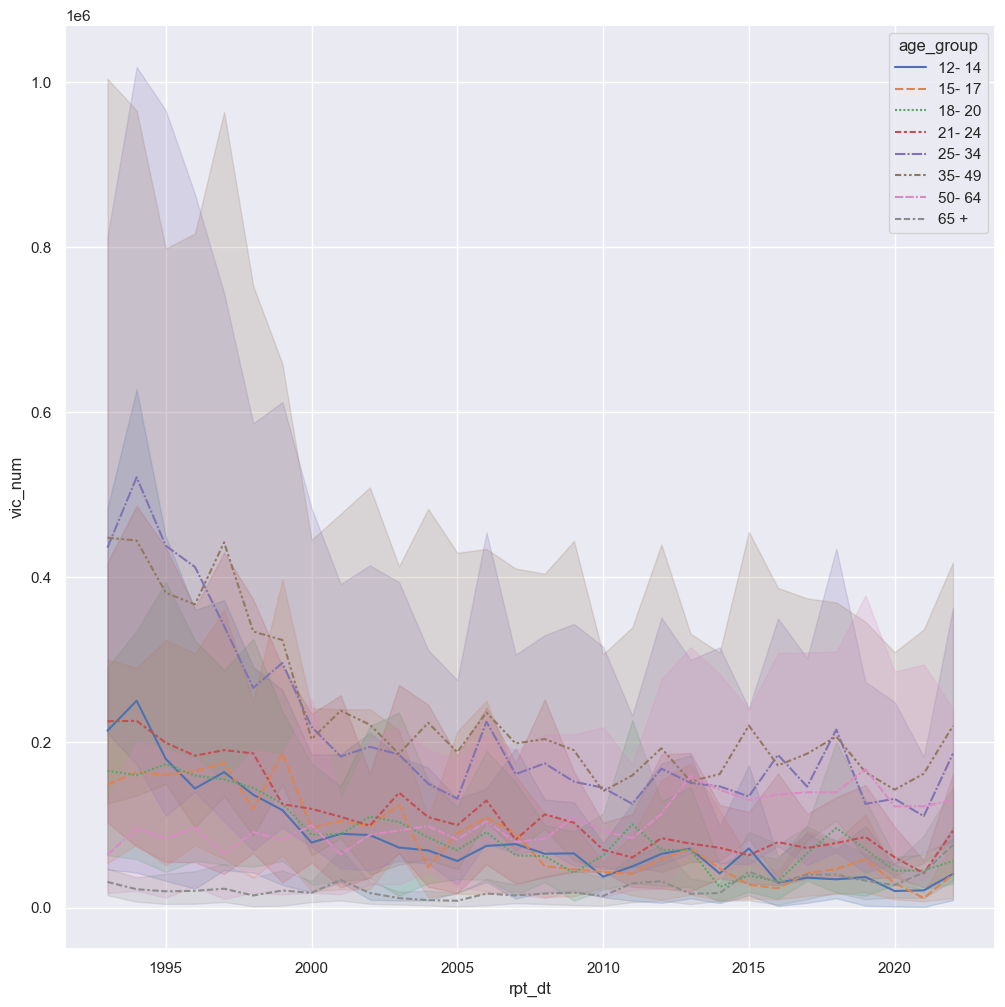

In [112]:
sns.lineplot(data=NCVS_AgeSeg, x='rpt_dt', y='vic_num', hue='age_group', style='age_group')